# Analiza možnosti za nedeljski izlet
Podatki so zajeti s spletne strani [hribi.net](http://www.hribi.net/goreiskanjerezultat.asp?drzavaid=1&gorovjeid=&goraime=&VisinaMIN=&VisinaMAX=&CasMIN=&CasMAX=&izhodisce=&izhodisceMIN=&izhodisceMAX=&VisinskaRazlikaMIN=&VisinskaRazlikaMAX=&zahtevnostid=&zahtevnostSmucanjeid=&IzhodisceMinOddaljenost=&IzhodisceMAXOddaljenost=&GoraMinOddaljenost=&GoraMaxOddaljenost=&mojaSirina=0&mojaDolzina=0), kjer je trenutno 1704 možnosti za izbiro izleta po Sloveniji (*19. 12. 2018*).
### V spodnji analizi so zbrani naslednji podatki:
* ime izleta,
* nadmorska višina,
* mesto priljubljenosti,
* procent priljubljenosti,
* zahtevnost poti,
* čas hoje,
* število poti,
* vrsta izletniške točke,
* gorovje v katerem se nahaja in
* opis izletniške točke.

## Analiza podatkov
Podatki iz osnovne tabele so predstavljeni v popravljeni tabeli. Ta namesto mešanega stolpca 'Čas poti', vsebuje stolpec 'Čas poti v minutah'. 

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 7]
pd.options.display.max_rows = 20

In [287]:
izleti = pd.read_csv('../Prog1_projekt_izlet/Prog1_projekt_izlet/podatki_izlet/podatki_izletov.csv', index_col = 'id')
izleti.columns = ['Ime', 'Gorovje', 'Nadmorska višina v metrih', 'Vrsta', 'Priljubljenost v %', 
                  'Mesto priljubljenosti', 'Št. poti', 'Opis', 'Čas poti', 'Zahtevnost poti']
izleti = izleti[['Ime', 'Nadmorska višina v metrih', 'Mesto priljubljenosti', 'Priljubljenost v %', 
                 'Zahtevnost poti', 'Čas poti', 'Št. poti', 'Vrsta', 'Gorovje', 'Opis']]

Sprememba enot v stolpcu 'Čas poti'. Uporabili smo naslednjo funkcijo:

In [293]:
def v_minute(x):
    if x < 9 :
        x = 60*x
    return x

In [294]:
izleti['Čas poti v min'] = izleti['Čas poti'].apply(v_minute)
izleti = izleti.drop(columns = 'Čas poti')

Oglejmo si razpredelnico izletov s katero bomo nadaljevali:

In [295]:
izleti = izleti[['Ime', 'Nadmorska višina v metrih', 'Mesto priljubljenosti', 'Priljubljenost v %', 
                 'Zahtevnost poti', 'Čas poti v min', 'Št. poti', 'Vrsta', 'Gorovje', 'Opis']]
izleti

,Ime,Nadmorska višina v metrih,Mesto priljubljenosti,Priljubljenost v %,Zahtevnost poti,Čas poti v min,Št. poti,Vrsta,Gorovje,Opis
id,,,,,,,,,,
1950,Ahac,799,1382,46,lahka označena pot,40,5,"vrh, cerkev","Goriško, Notranjsko in Snežniško hribovje","Ahac oz. sv. Ahac je 799 m visok vrh, ki se na..."
2566,Ajdovščina,804,2054,19,lahka neoznačena steza,40,1,vrh,"Goriško, Notranjsko in Snežniško hribovje","Ajdovščina je 804 metre visok vrh, ki se nahaj..."
891,Ankaran,18,547,78,lahka označena pot,180,3,NaN,"Goriško, Notranjsko in Snežniško hribovje","Ankaran je naselje ob slovenski obali, ki se n..."
2594,Baba (pri Javornikih),1085,2081,18,lahka neoznačena steza,60,2,vrh,"Goriško, Notranjsko in Snežniško hribovje","Baba je 1085 metrov visok vrh, ki se nahaja me..."
1740,Bela stena,1122,1236,51,lahka označena pot,120,1,vrh,"Goriško, Notranjsko in Snežniško hribovje",Bela stena (tudi samo Stene) je razgledna točk...
1227,Bele ovce,1029,1204,53,lahka neoznačena steza,30,1,vrh,"Goriško, Notranjsko in Snežniško hribovje","Bele ovce so neporaščen vrh, ki se nahaja vzho..."
1144,Bele stene,863,1310,49,lahka označena pot,60,2,NaN,"Goriško, Notranjsko in Snežniško hribovje",Bele stene se nahajajo severno od vasi Jurišče...
2135,Belovka,848,1579,38,lahka neoznačena steza,15,2,vrh,"Goriško, Notranjsko in Snežniško hribovje","Belovka je 848 metrov visok hrib, ki se nahaja..."
2556,Bezgarska planina,895,2257,11,lahka označena pot,45,4,planina,"Goriško, Notranjsko in Snežniško hribovje",Bezgarska planina se nahaja zahodno od Borovšk...


Povprečni izlet ima naslednje lastnosti:

In [296]:
povprecni_izlet = izleti.mean()
povprecni_izlet

Nadmorska višina v metrih    1197.588615
Mesto priljubljenosti        1041.220070
Priljubljenost v %             59.075704
Čas poti v min                 94.024061
Št. poti                        3.225352
dtype: float64

In [297]:
priljubljeni = izleti['Priljubljenost v %'] >= 80
priljubljeni_izleti = izleti[priljubljeni]

In [298]:
kratki = izleti['Čas poti v min'] <= 20
zacetniski = izleti[priljubljeni & kratki]

In [299]:
nizji = izleti['Nadmorska višina v metrih'] <= 1500
krajsi = izleti['Čas poti v min'] <= 30
druzinski = izleti[priljubljeni & nizji & krajsi]

In [300]:
visji = izleti['Nadmorska višina v metrih'] >= 1500
daljsi = izleti['Čas poti v min'] > 60
sportni = izleti[priljubljeni & visji & daljsi] 

In [301]:
visoki = izleti['Nadmorska višina v metrih'] >= 2000
dolgi = izleti['Čas poti v min'] >= 300
ekstremni = izleti[priljubljeni & visoki & dolgi]

In [302]:
st_za = zacetniski.count()
st_dr = druzinski.count()
st_sp = sportni.count()
st_ek = ekstremni.count()

In [303]:
zahtevnost = izleti.groupby('Zahtevnost poti')
zahtevnost.size().sort_values(ascending=False)

Zahtevnost poti
lahka označena pot                1047
lahka neoznačena steza             325
delno zahtevna označena pot         72
lahko brezpotje                     69
zahtevna označena pot               43
zelo zahtevna označena pot          35
delno zahtevna neoznačena pot       33
zahtevno brezpotje                  27
zahtevna neoznačena steza           24
zelo zahtevno brezpotje             12
izjemno zahtevna označena pot        7
zelo zahtevna neoznačena steza       5
alpinistični vzpon                   3
ni podatka                           2
dtype: int64

In [304]:
gorovje = izleti.groupby('Gorovje')
izleti_v_gorovju = gorovje.size().sort_values(ascending=False)
izleti_v_gorovju

Gorovje
Julijske Alpe                                    462
Goriško, Notranjsko in Snežniško hribovje        263
Kamniško Savinjske Alpe                          257
Karavanke                                        255
Zasavsko - Posavsko hribovje in Dolenjska        181
Škofjeloško, Cerkljansko hribovje in Jelovica    116
Pohorje in ostala severovzhodna Slovenija         92
Polhograjsko hribovje in Ljubljana                78
dtype: int64

Izleti v različnih gorovjih pa imajo take lastnosti:

In [305]:
gorovje.mean()

,Nadmorska višina v metrih,Mesto priljubljenosti,Priljubljenost v %,Čas poti v min,Št. poti
Gorovje,,,,,
"Goriško, Notranjsko in Snežniško hribovje",783.376426,1229.536122,51.646388,67.053232,2.893536
Julijske Alpe,1638.835498,832.134199,67.296537,143.140693,2.831169
Kamniško Savinjske Alpe,1430.891051,829.622568,67.392996,102.182879,4.171206
Karavanke,1335.329412,1150.521569,54.800000,84.019608,3.333333
Pohorje in ostala severovzhodna Slovenija,844.445652,1268.608696,50.119565,75.239130,2.369565
Polhograjsko hribovje in Ljubljana,644.192308,1036.743590,59.230769,45.897436,3.961538
Zasavsko - Posavsko hribovje in Dolenjska,695.348066,1194.353591,53.077348,61.712707,2.895028
"Škofjeloško, Cerkljansko hribovje in Jelovica",995.508621,1259.250000,50.508621,61.146552,3.913793


#### Zanima nas kako se število izletov spreminja z gorovji:

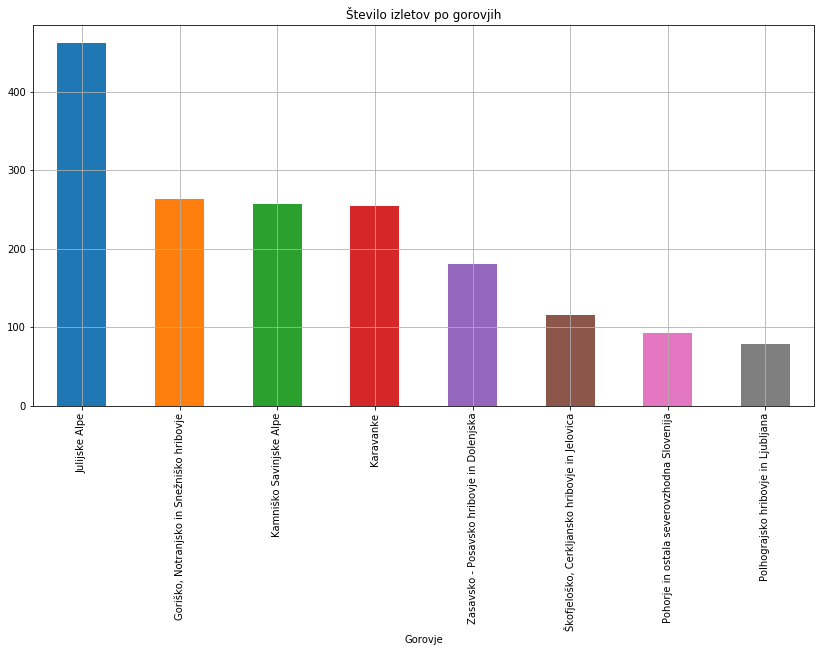

In [306]:
izleti_v_gorovju.plot.bar(title = 'Število izletov po gorovjih', grid = True)

Po pričakovanjih je največ izletov v Julijskih Alpah, saj so najbolj razgibane in imajo več vrhov. 

#### Kako se spreminja višina med 30 najbolj priljubljenimi izleti?

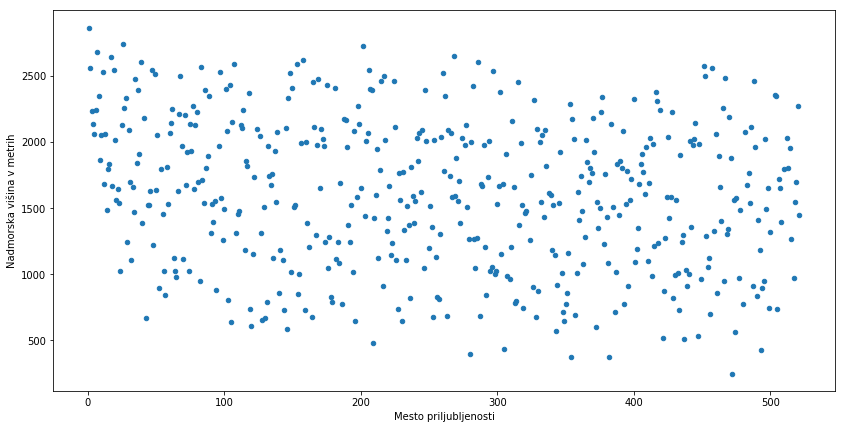

In [307]:
najbolj_priljubljeni = priljubljeni_izleti.sort_values('Mesto priljubljenosti').head(500)
#najbolj_priljubljeni.plot.bar(x = 'Ime', y = 'Nadmorska višina v metrih', title = 'Spreminjaje višine med 30 najbolj priljubljenimi izleti',grid=True)
najbolj_priljubljeni.plot.scatter('Mesto priljubljenosti', 'Nadmorska višina v metrih')

############# TODO komentiraj

Kako se spreminja čas poti z višino

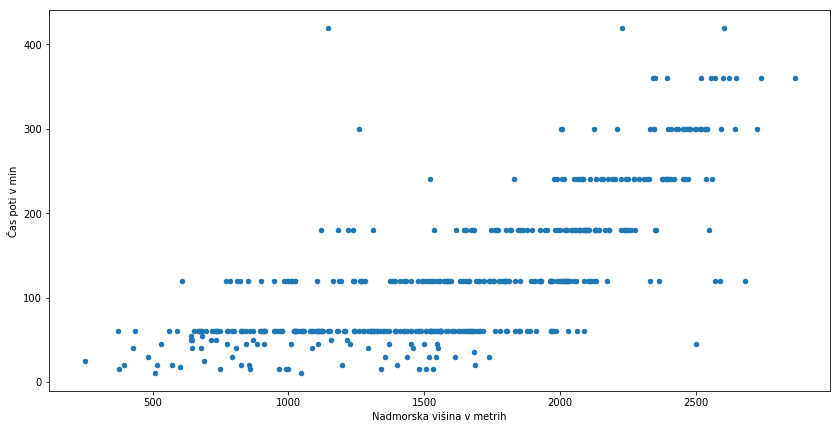

In [330]:
najbolj_priljubljeni.sort_values('Nadmorska višina v metrih').plot.scatter('Nadmorska višina v metrih', 'Čas poti v min')

Pričakovano je bilo, da se bo z nadmorsko višino večal tudi čas poti. Iz grafa vidimo, da to načeloma drži, vendar obstajajo tudi izjeme. Velika dolžina poti pri nižje ležečih izletih se pojavi zaradi tega, ker je pot dolga, ne pa strma. V visokih predelih pa so poti, do katerih se lahko dostopa z avtom in nato hodi manj časa.